In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mplfinance as mpf
import talib
import pandas_ta as ta
from sklearn import tree, ensemble, model_selection, cluster, metrics, neural_network,preprocessing
from sklearn.feature_extraction import text
import seaborn
import jieba
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<div class="jumbotron">
    <p class="display-1 h1">Alpha模型——数据驱动</p>
    <hr class="my-4">
    <p>主讲：李岩</p>
    <p>管理学院</p>
    <p>liyan@cumtb.edu.cn</p>
</div>

# 数据挖掘基础

## 数据挖掘

<dl class="row alert-info">
    <dt class="col-md-3">数据挖掘</dt>
    <dd class="col-md-9">从大量的数据中通过<strong>算法</strong>搜索<strong>隐藏</strong>于其中的信息的过程。</dd>
</dl>

### 应用领域广泛

- 金融
    + 信用卡交易反欺诈
    + 贷款申请反欺诈
    + 反洗钱
    + 推荐基金产品、保险产品等

- 电子商务（零售）
    + 推荐商品
    + 交叉销售
    + 销量预测等

- 媒体
    + 推荐相关内容，例如今日头条、抖音等

- 能源
    + 捕捉危险事件
    + 电力需求预测
    + 根据实时能源价格优化能源分配

- 医药
    + 疾病鉴别诊断
    + 药物研发
    + 智能健康电子记录
    + 流行病爆发预测

- 电信
    + 客户流失预测

### 机器学习算法分类

<center>
    <img src="./img/dataMining/miningAlgo.png" width=100%>
</center>

#### 监督学习v.s.无监督学习

<dl class="row alert-info">
    <dt class="col-md-3">有监督学习</dt>
    <dd class="col-md-9">输入数据<strong>带有</strong>标签。</dd>
</dl>
<dl class="row alert-danger">
    <dt class="col-md-3">无监督学习</dt>
    <dd class="col-md-9">输入数据<strong>不带</strong>标签。</dd>
</dl>

<center><img src="./img/dataMining/supervisedunsupervised.jpg" width=80%></center>

#### 监督v.s.无监督在数据集中的表现

##### 监督学习

In [144]:
titanicDf = pd.read_csv('./data/models/train.csv')
titanicDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 标签：`Survived`

In [146]:
bostonDf = pd.read_csv('./data/models/boston.csv')
bostonDf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- 标签：`MEDV`

##### 无监督学习

In [148]:
rfmDf = pd.read_csv('../data-mining/data/mining/rfm.csv')
rfmDf.head()

,USERID,最近一次消费间隔,年消费次数,年消费金额,R,F,M,RFM,Label
0,142074,813,2,9408.9,1,2,5,125,流失客户
1,56927,481,2,8826.9,5,2,5,525,重要价值客户
2,87058,680,2,11898.0,2,2,5,225,新客户
3,136104,818,1,5999.0,1,1,5,115,流失客户
4,117831,818,1,5399.0,1,1,5,115,流失客户


### 数据挖掘建模流程

<center><img src="./img/dataMining/miningModelling.png" width=80%></center>

## `scikit-learn`介绍

`scikit-learn`软件包

[https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)

- `scikit-learn`是`Python`的一个开源机器学习模块，它建立在`NumPy`，`SciPy`和`matplotlib`模块之上

- 为用户提供各种机器学习算法接口，可以让用户简单、高效地进行数据挖掘和数据分析

- 安装：`pip install -U scikit-learn`

- 使用：`from sklearn import 模块名称`

### 内置数据

- 两种类型数据的加载方式
    + 小规模数据：`load_数据名称()`
    + 大规模数据：`fetch_数据名称()`

- 返回的数据的结构：字典结构，至少包括两个关键字
    + `data`：属性（特征），`numpy`格式的矩阵，有`n_samples`行和`n_features`列
    + `target`：标签，`numpy`格式的数组，长度是`n_samples`

- 返回的数据具有`DESCR`属性，给予数据集详细描述

#### 小规模数据集

命令|数据描述|适合的方法
---|---|---
`load_boston()`|波士顿的房价数据|回归
`load_iris()`|鸢尾花（iris）数据集|分类
`load_diabetes()`|糖尿病(diabetes)数据集|回归
`load_digits()`|手写体数据集|分类
`load_linnerud()`|体能训练数据集|多元回归
`load_wine()`|酒类数据集|分类
`load_breast_cancer()`|威斯康星乳腺癌|分类

In [4]:
from sklearn import datasets

In [78]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [79]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [80]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [81]:
irisDf = pd.DataFrame(iris.data,columns=iris.feature_names)
irisDf['class'] = iris.target
irisDf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [82]:
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [83]:
diabetesDf = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
diabetesDf['target'] = diabetes.target
diabetesDf.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


#### 大规模数据集

命令|数据描述|适合的方法
---|---|---
`fetch_olivetti_faces()`|Olivetti人脸识别数据|分类
`fetch_20newsgroups()`|包括20个话题的新闻文本数据|分类
`fetch_20newsgroups_vectorized()`|包括20个话题的新闻文本向量化数据|分类
`fetch_lfw_people()`|带标签的人脸识别数据|分类
`fetch_lfw_pairs()`|带标签的人脸识别数据|分类
`fetch_covtype()`|森林植被类型数据|分类
`fetch_rcv1()`|路透社英文新闻文本数据|分类
`fetch_kddcup99()`|网络入侵检测数据|分类
`fetch_california_housing()`|加利福尼亚房价数据|回归

In [84]:
calh = datasets.fetch_california_housing()
print(calh.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [85]:
calhDf = pd.DataFrame(calh.data,columns=calh.feature_names)
calhDf['HouseValue'] = calh.target
calhDf.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### `sklearn`数据挖掘一般流程

<center><img src="./img/dataMining/sklearnApp.png" width=80%></center>

### 波士顿房价 

#### 读取数据

In [5]:
bst = datasets.load_boston()
bstDf = pd.DataFrame(bst.data,columns=bst.feature_names)
bstDf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### 建立模型

In [6]:
from sklearn import linear_model
bstLearModel = linear_model.LinearRegression()
bstLearModel

LinearRegression()

#### 训练模型

In [7]:
bstLearModel.fit(bst.data,bst.target)

LinearRegression()

In [9]:
# 获取模型参数
bstLearModel.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

##### 得到回归系数与截距

- 回归系数：`bstLearModel.coef_`
- 截距：`bstLearModel.intercept_`

In [10]:
print(f'回归系数为{[round(x,3) for x in bstLearModel.coef_]}')
print(f'截距为{bstLearModel.intercept_:.3f}')

回归系数为[-0.108, 0.046, 0.021, 2.687, -17.767, 3.81, 0.001, -1.476, 0.306, -0.012, -0.953, 0.009, -0.525]
截距为36.459


##### 拟合度

In [11]:
bstR2 = bstLearModel.score(bst.data,bst.target)
print(f'回归的R-squre为{bstR2:.3f}')

回归的R-squre为0.741


#### 预测

In [12]:
predicted = bstLearModel.predict(bst.data)
resDf = pd.DataFrame({'原价格':bst.target,'预测价格':predicted})
resDf

,原价格,预测价格
0,24.0,30.003843
1,21.6,25.025562
2,34.7,30.567597
3,33.4,28.607036
4,36.2,27.943524
...,...,...
501,22.4,23.533341
502,20.6,22.375719
503,23.9,27.627426
504,22.0,26.127967


### 预处理模块

```python
    from sklearn import preprocessing
```

#### 标准化

给定序列$\{x_1,x_2,x_n\}$，$\bar{x}$为其均值，$\sigma$为其标准差，则标准化为，

$$
\hat{x}_i=\frac{x_i-\bar{x}}{\sigma}
$$

```python
preprocessing.scale(X, axis=0)
```
- `axis`：沿轴标准化数据

In [13]:
bstPrice = bst.target
bstPrice.mean()
bstPrice.std()

22.532806324110677

9.188011545278203

In [14]:
from sklearn import preprocessing
bstPriceStd = preprocessing.scale(bstPrice)
bstPriceStd[:10]
bstPriceStd.mean()
bstPriceStd.std()

array([ 0.15968566, -0.10152429,  1.32424667,  1.18275795,  1.48750288,
        0.6712218 ,  0.03996443,  0.49708184, -0.65659542, -0.39538548])

-5.195668225913776e-16

0.9999999999999999

##### 标准化模型

In [16]:
# 建立模型
stdScaler = preprocessing.StandardScaler()

In [18]:
# 拟合数据
stdScaler.fit(bstPrice.reshape(-1,1))

StandardScaler()

In [19]:
stdScaler.get_params()

{'copy': True, 'with_mean': True, 'with_std': True}

In [22]:
# 原始数据变换
stdScaler.transform(bstPrice.reshape(-1,1))

array([[ 0.15968566],
       [-0.10152429],
       [ 1.32424667],
       [ 1.18275795],
       [ 1.48750288],
       [ 0.6712218 ],
       [ 0.03996443],
       [ 0.49708184],
       [-0.65659542],
       [-0.39538548],
       [-0.81985164],
       [-0.39538548],
       [-0.09064054],
       [-0.23212926],
       [-0.47157171],
       [-0.286548  ],
       [ 0.06173193],
       [-0.54775795],
       [-0.25389676],
       [-0.47157171],
       [-0.97222411],
       [-0.31919924],
       [-0.79808414],
       [-0.87427038],
       [-0.75454915],
       [-0.93957286],
       [-0.64571167],
       [-0.84161913],
       [-0.44980422],
       [-0.16682677],
       [-1.07017784],
       [-0.87427038],
       [-1.0157591 ],
       [-1.02664285],
       [-0.98310786],
       [-0.39538548],
       [-0.27566425],
       [-0.16682677],
       [ 0.23587189],
       [ 0.89978051],
       [ 1.34601416],
       [ 0.4426631 ],
       [ 0.30117438],
       [ 0.23587189],
       [-0.14505928],
       [-0

#### MinMax变换

给定序列$x_i, i=1,2,\cdots,n$，$x_{\max}$为其最大值，$x_{\min}$为其最小值，则

$$
\hat{x}_i=\frac{x_i-x_{\min}}{x_{\max}-x_{\min}}
$$

In [23]:
#建立模型
minmaxScaler = preprocessing.MinMaxScaler()

In [24]:
#拟合数据
minmaxScaler.fit(bstPrice.reshape(-1,1))

MinMaxScaler()

In [25]:
minmaxScaler.get_params()

{'copy': True, 'feature_range': (0, 1)}

In [26]:
#原始数据变换
minmaxScaler.transform(bstPrice.reshape(-1,1))

array([[0.42222222],
       [0.36888889],
       [0.66      ],
       [0.63111111],
       [0.69333333],
       [0.52666667],
       [0.39777778],
       [0.49111111],
       [0.25555556],
       [0.30888889],
       [0.22222222],
       [0.30888889],
       [0.37111111],
       [0.34222222],
       [0.29333333],
       [0.33111111],
       [0.40222222],
       [0.27777778],
       [0.33777778],
       [0.29333333],
       [0.19111111],
       [0.32444444],
       [0.22666667],
       [0.21111111],
       [0.23555556],
       [0.19777778],
       [0.25777778],
       [0.21777778],
       [0.29777778],
       [0.35555556],
       [0.17111111],
       [0.21111111],
       [0.18222222],
       [0.18      ],
       [0.18888889],
       [0.30888889],
       [0.33333333],
       [0.35555556],
       [0.43777778],
       [0.57333333],
       [0.66444444],
       [0.48      ],
       [0.45111111],
       [0.43777778],
       [0.36      ],
       [0.31777778],
       [0.33333333],
       [0.257

#### 考虑离群点的数据标准化

- `StandardScaler`与`MinMaxScaler`的不足：
    - 对离群点敏感

- `RobustScaler`
    - 利用中位数和四分位数标准化数据

In [28]:
# 建立模型
robustScaler = preprocessing.RobustScaler()

In [29]:
# 拟合数据
robustScaler.fit(bstPrice.reshape(-1,1))

RobustScaler()

In [30]:
robustScaler.get_params()

{'copy': True,
 'quantile_range': (25.0, 75.0),
 'with_centering': True,
 'with_scaling': True}

In [31]:
# 将原始数据变换
robustScaler.transform(bstPrice.reshape(-1,1))

array([[ 0.35109718],
       [ 0.05015674],
       [ 1.69278997],
       [ 1.52978056],
       [ 1.88087774],
       [ 0.94043887],
       [ 0.21316614],
       [ 0.73981191],
       [-0.58934169],
       [-0.28840125],
       [-0.77742947],
       [-0.28840125],
       [ 0.06269592],
       [-0.10031348],
       [-0.37617555],
       [-0.1630094 ],
       [ 0.23824451],
       [-0.46394984],
       [-0.12539185],
       [-0.37617555],
       [-0.95297806],
       [-0.20062696],
       [-0.7523511 ],
       [-0.84012539],
       [-0.70219436],
       [-0.9153605 ],
       [-0.57680251],
       [-0.80250784],
       [-0.35109718],
       [-0.02507837],
       [-1.06583072],
       [-0.84012539],
       [-1.0031348 ],
       [-1.01567398],
       [-0.96551724],
       [-0.28840125],
       [-0.15047022],
       [-0.02507837],
       [ 0.43887147],
       [ 1.20376176],
       [ 1.71786834],
       [ 0.67711599],
       [ 0.51410658],
       [ 0.43887147],
       [ 0.        ],
       [-0

## 其他数据挖掘模块

- PySpark：针对大数据的数据挖掘与机器学习工具，是`Spark`的`Python`接口

- Apache `Spark`
    + `Spark`：专为大规模数据处理而设计的快速通用的计算引擎

- 官网：[http://spark.apache.org/docs/latest/api/python/index.html](http://spark.apache.org/docs/latest/api/python/index.html)

- 学习链接：[http://codingdict.com/article/8888](http://codingdict.com/article/8888)

# 分类模型

> 如何判断贷款者是否会拖欠贷款？

In [94]:
debtDict = {'Tid': range(10), 
            '有房者': ['是', '否', '否', '是', '否', '否', '是','否', '否', '否'], 
            '婚姻状况': ['单身', '已婚', '单身', '已婚', '离异', '已婚', '离异', '单身', '已婚', '单身'], 
            '年收入': ['125K', '100K', '70K', '120K', '95K', '60K', '220K', '85K', '75K', '90K'], 
            '拖欠贷款者': ['否', '否', '否', '否', '是', '否', '否', '是', '否', '是']}

In [95]:
pd.DataFrame(debtDict)

,Tid,有房者,婚姻状况,年收入,拖欠贷款者
0,0,是,单身,125K,否
1,1,否,已婚,100K,否
2,2,否,单身,70K,否
3,3,是,已婚,120K,否
4,4,否,离异,95K,是
5,5,否,已婚,60K,否
6,6,是,离异,220K,否
7,7,否,单身,85K,是
8,8,否,已婚,75K,否
9,9,否,单身,90K,是


## 基本概念

### 分类（classification） 

- 给定一条记录$(\boldsymbol{x}, y)$，其中，$y$是分类属性或者目标属性，$\boldsymbol{x}$是该记录预测属性的集合

- 通过学习得到一个**目标函数**（target function）$f$，把每个属性集$\boldsymbol{x}$映射到一个预先定义的**类标签**$y$

$$
y = f(\boldsymbol{x})
$$

- 目标函数也被称作**分类模型**（classification model）

### 建立分类模型的一般方法

<center><img src="./img/dataMining/classificationProcess.png" width=80%></center>

#### 训练集与检验集

- 训练集（training set）：由类标签已知的数据记录组成，用于建立分类模型

- 检验集（test set）：用来检验分类规则的数据记录集合

#### 分类算法

+ k最近邻分类
+ **决策树**
+ 朴素贝叶斯分类
+ 逻辑回归
+ 神经网络
+ 支持向量机
+ **随机森林**

#### 混淆矩阵（confusion matrix）

- 由分类模型做出的正确和错误的分类结果构成的矩阵

- 二元分类问题的混淆矩阵

<center><img src="./img/dataMining/PosNeg.svg" width=60%></center>

#### 性能度量（performance metric）

- 汇总混淆矩阵的信息

- 准确率（accuracy）

$$
准确率=\frac{正确预测数}{预测总数}=\frac{TP+TN}{TP+FN+FP+TN}
$$

- 错误率（error rate）

$$
错误率=\frac{错误预测数}{预测总数}=\frac{FN+FP}{TP+FN+FP+TN}
$$

$$
错误率+准确率=1
$$

<center><img src="./img/dataMining/PosNeg.svg" width=60%></center>

- 精确率（precision score, 查准率）
$$precision = \frac{TP}{TP+FP}$$

- 针对某个类别的样本，不做出错误分类的能力

- 召回率（recall score，查全率）
$$recall = \frac{TP}{TP+FN}$$

- 能够识别所有属于某个真实类别的样本的能力

##### 准确率 (accuracy score)

```python
from sklearn import metrics
metrics.accuracy_score(y_true, y_pred)
```
- `y_true`：真实类标签构成的数组
- `y_pred`：分类模型预测的类标签构成的数组

##### 召回率 （recall score）

```python
metrics.recall_score(y_true, y_pred, pos_label=1)
```

##### 精确率（precision score）

```python
from sklearn import metrics
metrics.precision_score(y_true, y_pred, pos_label=1)
```

##### $F_1$ score

- 同时考虑召回率和精确率，是召回率和精确率的调和均值

```python
from sklearn import metrics
metrics.f1_score(y_true, y_pred, pos_label=1)
```

##### P-R曲线

- 由精确率和召回率构成的图线
- x轴为召回率，y轴为精确率

```python
sklearn.metrics.plot_precision_recall_curve(estimator, X, y, pos_label)
```
- `estimator`：训练过的分类模型
- `X`：输入的属性
- `y`：标签值（二元标签）
- `pos_label`：`int`或`str`，指定类别，默认为1

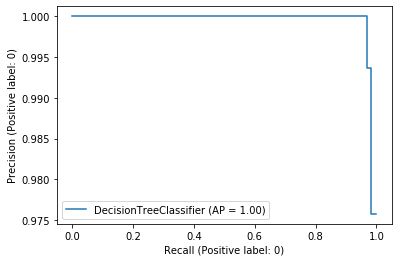

In [147]:
metrics.plot_precision_recall_curve(titDt,titTrainX,titTrainY,pos_label=0)

- `AP`：average precision score，越大越好

##### ROC曲线

- Receiver Operating Curve, 由“真正例率”（True Positive Rate）和“假正例率”（False Positive Rate）构成的曲线
$$
TPR = \frac{TP}{TP+FN}\\
FPR = \frac{FP}{FP+TN}
$$
- x轴是FPR，y轴是TPR

```python
sklearn.metrics.plot_roc_curve(estimator, X, y, pos_label)
```
- `estimator`：训练过的分类模型
- `X`：输入的属性
- `y`：标签值（二元标签）
- `pos_label`：`int`或`str`，指定类别，默认为1

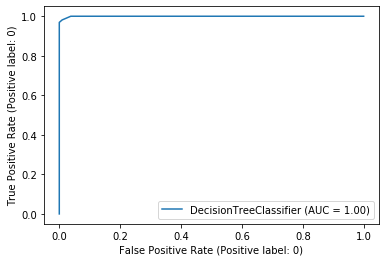

In [148]:
metrics.plot_roc_curve(titDt,titTrainX,titTrainY,pos_label=0)

- `AUC`：area under curve，曲线下面积，越大越好

- 两种曲线的选用条件
    - ROC，适用于类别均衡情况
    - PR，适用于类别不均衡情况
        - Positive占比小于0.05或大于0.95

## 决策树

<center><img src="./img/dataMining/classificationSample.gv.svg" with=100%></center>

<center><img src="./img/dataMining/decisionTree.gv.svg" with=50%></center>

<center><img src="./img/dataMining/decisionTree1.gv.svg"></center>

> 对于同一个问题而言，决策树不是唯一的

### 基本概念

<center><img src="./img/dataMining/decisionTreeC.gv.svg" with=60%></center>

- **根结点**（root node）
    + 没有入边，但有零条或多条出边

- **内部结点**（internal node）
    + 恰有一条入边和两条或多条出边

- **叶结点**（leaf node）
    + 恰有一条入边，但没有出边
    + 又被称为终结点（terminal node）

- 每个叶结点赋予一个类标签

- 每个**非叶**结点包含属性测试的条件

### `sklearn`实现 

#### 建立模型

```python
from sklearn import tree
tree.DecisionTreeClassifier(criterion='gini'）
```
- `criterion`：`str`类型，不纯性的度量，可以是`gini`和`entropy`，默认是`gini`

- 生成的决策树的属性（Attributes）
    + `classes_ `：由类标签构成的数组
    + `n_classes_`：`int`，类别的数量
    + `tree_`：建立的决策树

In [96]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### 用决策树预测

```python
dt.predict(X)
```
- `X`：输入的属性矩阵，形状为`[n_samples, n_features]`
- 返回值：预测的类别，形状为`[n_samples]`的数组

#### 分割训练集与测试集

```python
from sklearn.model_selection import train_test_split
train_test_split(*arrays, test_size=0.25)
```

- `*arrays`：需要被划分的数据集，可以是`list`类型、`numpy.arrays`类型，`pandas.DataFrame`类型

- `test_size`：检验集的规模
    + `float`类型，取值范围`[0,1]`，表示检验集占原数据集的比例
    + `int`类型，表示检验集包含的数据记录的绝对数量
    + 默认为0.25

- 返回值：分割好的训练集与检验集，与输入的`*array`的类型相同

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
titTrainX,titTestX,titTrainY,titTestY = train_test_split(titXOH,titY)
titTrainX
titTestX
titTrainY.value_counts()
titTestY.value_counts()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
531,2,2.0,1,1,26.0000,1,0,0,0,1
34,2,66.0,0,0,10.5000,0,1,0,0,1
457,1,65.0,0,0,26.5500,0,1,0,0,1
752,3,6.0,0,1,12.4750,0,1,0,0,1
687,3,14.0,4,1,39.6875,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
495,3,21.0,0,0,8.0500,0,1,0,0,1
543,3,11.0,4,2,31.2750,1,0,0,0,1
171,1,61.0,0,0,33.5000,0,1,0,0,1


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
403,3,21.0,1,0,9.825,1,0,0,0,1
443,3,25.0,1,0,7.775,0,1,0,0,1
277,3,45.0,0,0,7.750,1,0,0,0,1
250,2,54.0,1,0,26.000,0,1,0,0,1
511,3,29.0,0,0,7.750,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
163,3,26.0,0,0,7.775,0,1,0,0,1
464,2,48.0,0,0,13.000,0,1,0,0,1
734,2,23.0,0,0,13.000,0,1,0,0,1


0    317
1    217
Name: Survived, dtype: int64

0    107
1     71
Name: Survived, dtype: int64

#### 建立决策树模型

In [105]:
titDt = tree.DecisionTreeClassifier(random_state=10)

#### 在训练集上训练模型

In [106]:
titDt.fit(titTrainX,titTrainY)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

#### 分类性能度量 

In [107]:
titTrainYPre = titDt.predict(titTrainX)

##### 混淆矩阵

```python
    from sklearn import metrics
    metrics.confusion_matrix(y_true, y_pred)
    metrics.plot_confusion_matrix(estimator, X, y_true, values_format=None)
```
- `estimator`：训练好的分类器
- `X`：预测属性
- `value_formats`：数字的显示格式

In [108]:
from sklearn import metrics

array([[317,   0],
       [  6, 211]])

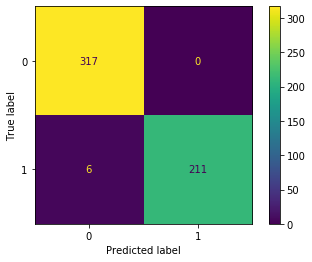

In [109]:
metrics.confusion_matrix(titTrainY, titTrainYPre)
metrics.plot_confusion_matrix(titDt,titTrainX,titTrainY,values_format='.0f')

<center><img src="./img/dataMining/classificationScoreN1.png" width=100%></center>

## 用决策树分类收益率构建择时模型

### 基本原理

> 投资**收益率**的可预测性，而价格的不可预测性

- 构建预测属性，预测未来收益率的涨跌，从而决定买卖决策

### 读入并整理数据

In [70]:
rbd = pd.read_csv('./data/models/rbDaily.csv')
rbd.head()
rbd.shape

,time,code,open,high,low,close,volume,amount,open_interest
0,2016-01-04 15:00:00,shfe.rb0000,1821.0,1846.0,1773.0,1777.0,3350468.0,6.022048e+10,1531067.0
1,2016-01-05 15:00:00,shfe.rb0000,1779.0,1789.0,1761.0,1789.0,3206574.0,5.702488e+10,1585941.0
2,2016-01-06 15:00:00,shfe.rb0000,1787.0,1790.0,1769.0,1775.0,2301831.0,4.090336e+10,1550881.0
3,2016-01-07 15:00:00,shfe.rb0000,1770.0,1786.0,1766.0,1773.0,2326314.0,4.132192e+10,1536994.0
4,2016-01-08 15:00:00,shfe.rb0000,1769.0,1775.0,1747.0,1759.0,3329019.0,5.864873e+10,1442532.0


(1678, 9)

#### 判断是否有缺失值

In [6]:
rbd.loc[rbd.isna().sum(axis=1)>0,:]

,time,code,open,high,low,close,volume,amount,open_interest


#### 判断是否有重复值

In [7]:
rbd.loc[rbd.duplicated()==True,:]

,time,code,open,high,low,close,volume,amount,open_interest


#### 转换时间格式

In [71]:
rbd['time'] = pd.to_datetime(rbd['time'])
rbd['time'] = pd.to_datetime(rbd['time'].dt.date)
rbd.set_index('time',inplace=True)
rbd.head()

,code,open,high,low,close,volume,amount,open_interest
time,,,,,,,,
2016-01-04,shfe.rb0000,1821.0,1846.0,1773.0,1777.0,3350468.0,6.022048e+10,1531067.0
2016-01-05,shfe.rb0000,1779.0,1789.0,1761.0,1789.0,3206574.0,5.702488e+10,1585941.0
2016-01-06,shfe.rb0000,1787.0,1790.0,1769.0,1775.0,2301831.0,4.090336e+10,1550881.0
2016-01-07,shfe.rb0000,1770.0,1786.0,1766.0,1773.0,2326314.0,4.132192e+10,1536994.0
2016-01-08,shfe.rb0000,1769.0,1775.0,1747.0,1759.0,3329019.0,5.864873e+10,1442532.0


### 构建分类标签

- 以日价格的增长率作为分类标签

#### 计算日增长率

In [72]:
rbd['ret'] = rbd['close'].pct_change()
rbd.head()

,code,open,high,low,close,volume,amount,open_interest,ret
time,,,,,,,,,
2016-01-04,shfe.rb0000,1821.0,1846.0,1773.0,1777.0,3350468.0,6.022048e+10,1531067.0,NaN
2016-01-05,shfe.rb0000,1779.0,1789.0,1761.0,1789.0,3206574.0,5.702488e+10,1585941.0,0.006753
2016-01-06,shfe.rb0000,1787.0,1790.0,1769.0,1775.0,2301831.0,4.090336e+10,1550881.0,-0.007826
2016-01-07,shfe.rb0000,1770.0,1786.0,1766.0,1773.0,2326314.0,4.132192e+10,1536994.0,-0.001127
2016-01-08,shfe.rb0000,1769.0,1775.0,1747.0,1759.0,3329019.0,5.864873e+10,1442532.0,-0.007896


#### 绘制价格与增长率（收益率）曲线

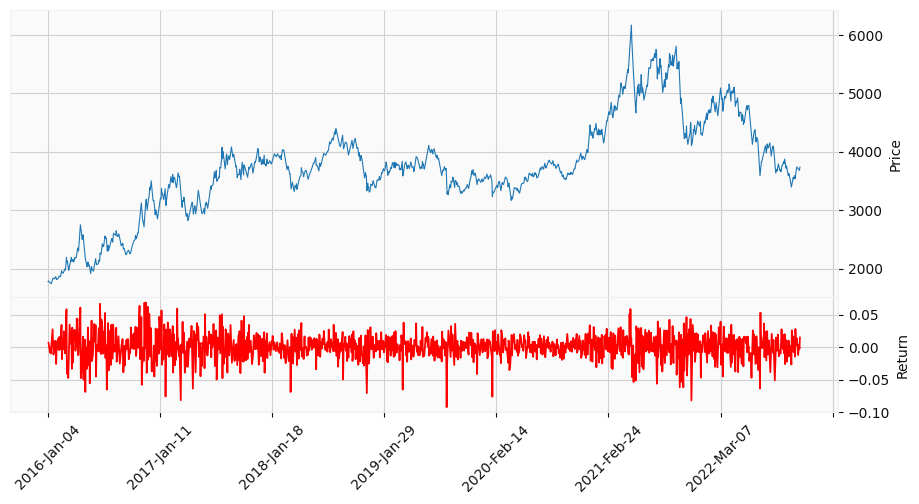

In [10]:
addFig = [mpf.make_addplot(rbd['ret'],panel=1,type='line',color='red',ylabel='Return')]
mpf.plot(rbd,type='line',style='yahoo',addplot=addFig,figratio=(12,6),figscale=1)

#### 收益率离散化

In [11]:
rbd['ret'].describe()

count    1677.000000
mean        0.000615
std         0.018507
min        -0.092328
25%        -0.008497
50%         0.000969
75%         0.010345
max         0.068790
Name: ret, dtype: float64

In [73]:
rbd['y'] = np.where(rbd['ret'] > 0,1,-1)
rbd.head()

,code,open,high,low,close,volume,amount,open_interest,ret,y
time,,,,,,,,,,
2016-01-04,shfe.rb0000,1821.0,1846.0,1773.0,1777.0,3350468.0,6.022048e+10,1531067.0,NaN,-1
2016-01-05,shfe.rb0000,1779.0,1789.0,1761.0,1789.0,3206574.0,5.702488e+10,1585941.0,0.006753,1
2016-01-06,shfe.rb0000,1787.0,1790.0,1769.0,1775.0,2301831.0,4.090336e+10,1550881.0,-0.007826,-1
2016-01-07,shfe.rb0000,1770.0,1786.0,1766.0,1773.0,2326314.0,4.132192e+10,1536994.0,-0.001127,-1
2016-01-08,shfe.rb0000,1769.0,1775.0,1747.0,1759.0,3329019.0,5.864873e+10,1442532.0,-0.007896,-1


### 构建分类属性（特征）

#### 动量因子

- 商品的超额收益在过去7日内的均值

In [74]:
rbd['mf'] = ta.sma(rbd['ret'],length=7)
rbd.head(14)

,code,open,high,low,close,volume,amount,open_interest,ret,y,mf
time,,,,,,,,,,,
2016-01-04,shfe.rb0000,1821.0,1846.0,1773.0,1777.0,3350468.0,6.022048e+10,1531067.0,NaN,-1,NaN
2016-01-05,shfe.rb0000,1779.0,1789.0,1761.0,1789.0,3206574.0,5.702488e+10,1585941.0,0.006753,1,NaN
2016-01-06,shfe.rb0000,1787.0,1790.0,1769.0,1775.0,2301831.0,4.090336e+10,1550881.0,-0.007826,-1,NaN
2016-01-07,shfe.rb0000,1770.0,1786.0,1766.0,1773.0,2326314.0,4.132192e+10,1536994.0,-0.001127,-1,NaN
2016-01-08,shfe.rb0000,1769.0,1775.0,1747.0,1759.0,3329019.0,5.864873e+10,1442532.0,-0.007896,-1,NaN
2016-01-11,shfe.rb0000,1757.0,1772.0,1748.0,1758.0,2540697.0,4.477157e+10,1417129.0,-0.000569,-1,NaN
2016-01-12,shfe.rb0000,1759.0,1765.0,1739.0,1741.0,2666511.0,4.666452e+10,1462839.0,-0.009670,-1,NaN
2016-01-13,shfe.rb0000,1741.0,1752.0,1735.0,1740.0,1795770.0,3.130531e+10,1395778.0,-0.000574,-1,-0.002987
2016-01-14,shfe.rb0000,1742.0,1759.0,1732.0,1758.0,2055150.0,3.586932e+10,1425936.0,0.010345,1,-0.002474


#### 波动率因子

- 因子构成：变异系数
\begin{align}
  &\frac{\sigma^2}{|\mu|}\\
  &\sigma^2=\frac{1}{D-1}\sum_{d=1}^D(r_{d,Front}-\mu)^2\\
  &\mu = \frac{1}{D}\sum_{d=1}^Dr_{d,Front}
\end{align}

In [75]:
retMu7 = ta.sma(rbd['ret'],length=7)
retVar7 = ta.variance(rbd['ret'],length=7)
rbd['vola'] = retVar7/np.abs(retMu7)
rbd.head(14)

,code,open,high,low,close,volume,amount,open_interest,ret,y,mf,vola
time,,,,,,,,,,,,
2016-01-04,shfe.rb0000,1821.0,1846.0,1773.0,1777.0,3350468.0,6.022048e+10,1531067.0,NaN,-1,NaN,NaN
2016-01-05,shfe.rb0000,1779.0,1789.0,1761.0,1789.0,3206574.0,5.702488e+10,1585941.0,0.006753,1,NaN,NaN
2016-01-06,shfe.rb0000,1787.0,1790.0,1769.0,1775.0,2301831.0,4.090336e+10,1550881.0,-0.007826,-1,NaN,NaN
2016-01-07,shfe.rb0000,1770.0,1786.0,1766.0,1773.0,2326314.0,4.132192e+10,1536994.0,-0.001127,-1,NaN,NaN
2016-01-08,shfe.rb0000,1769.0,1775.0,1747.0,1759.0,3329019.0,5.864873e+10,1442532.0,-0.007896,-1,NaN,NaN
2016-01-11,shfe.rb0000,1757.0,1772.0,1748.0,1758.0,2540697.0,4.477157e+10,1417129.0,-0.000569,-1,NaN,NaN
2016-01-12,shfe.rb0000,1759.0,1765.0,1739.0,1741.0,2666511.0,4.666452e+10,1462839.0,-0.009670,-1,NaN,NaN
2016-01-13,shfe.rb0000,1741.0,1752.0,1735.0,1740.0,1795770.0,3.130531e+10,1395778.0,-0.000574,-1,-0.002987,0.009669
2016-01-14,shfe.rb0000,1742.0,1759.0,1732.0,1758.0,2055150.0,3.586932e+10,1425936.0,0.010345,1,-0.002474,0.016354


#### 价值因子

- 因子构成

\begin{equation}
  \ln\frac{\frac{1}{D}\sum_{d=1}^D f_{d,Front}}{f_{t,Front}}
\end{equation}

In [76]:
closeMu7 = ta.sma(rbd['close'],length=7)
rbd['val'] = np.log(closeMu7/rbd['close'])
rbd.head(14)

,code,open,high,low,close,volume,amount,open_interest,ret,y,mf,vola,val
time,,,,,,,,,,,,,
2016-01-04,shfe.rb0000,1821.0,1846.0,1773.0,1777.0,3350468.0,6.022048e+10,1531067.0,NaN,-1,NaN,NaN,NaN
2016-01-05,shfe.rb0000,1779.0,1789.0,1761.0,1789.0,3206574.0,5.702488e+10,1585941.0,0.006753,1,NaN,NaN,NaN
2016-01-06,shfe.rb0000,1787.0,1790.0,1769.0,1775.0,2301831.0,4.090336e+10,1550881.0,-0.007826,-1,NaN,NaN,NaN
2016-01-07,shfe.rb0000,1770.0,1786.0,1766.0,1773.0,2326314.0,4.132192e+10,1536994.0,-0.001127,-1,NaN,NaN,NaN
2016-01-08,shfe.rb0000,1769.0,1775.0,1747.0,1759.0,3329019.0,5.864873e+10,1442532.0,-0.007896,-1,NaN,NaN,NaN
2016-01-11,shfe.rb0000,1757.0,1772.0,1748.0,1758.0,2540697.0,4.477157e+10,1417129.0,-0.000569,-1,NaN,NaN,NaN
2016-01-12,shfe.rb0000,1759.0,1765.0,1739.0,1741.0,2666511.0,4.666452e+10,1462839.0,-0.009670,-1,NaN,NaN,0.015066
2016-01-13,shfe.rb0000,1741.0,1752.0,1735.0,1740.0,1795770.0,3.130531e+10,1395778.0,-0.000574,-1,-0.002987,0.009669,0.012645
2016-01-14,shfe.rb0000,1742.0,1759.0,1732.0,1758.0,2055150.0,3.586932e+10,1425936.0,0.010345,1,-0.002474,0.016354,-0.000163


#### 增加更多因子

In [77]:
rbd['atr'] = ta.atr(rbd['high'],rbd['low'],rbd['close'],length=14)

In [78]:
rbd['obv'] = ta.obv(rbd['close'],rbd['volume'])

In [80]:
rbd['rsi'] = ta.rsi(rbd['close'],length=14)

In [81]:
bbands = ta.bbands(rbd['close'],length=20,std=2)
bbands.head()

,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0
time,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN,NaN
2016-01-07,NaN,NaN,NaN,NaN,NaN
2016-01-08,NaN,NaN,NaN,NaN,NaN


In [82]:
rbd['bbandsh'] = bbands['BBU_20_2.0']
rbd['bbandsl'] = bbands['BBL_20_2.0']

In [83]:
rbd['ret_lag2'] = rbd['ret'].shift(2)
rbd['ret_lag5'] = rbd['ret'].shift(5)
rbd['ret_lag21'] = rbd['ret'].shift(21)

#### 删除含有缺失值的行

In [84]:
rbd.dropna(inplace=True)
rbd.head()

,code,open,high,low,close,volume,amount,open_interest,ret,y,...,vola,val,atr,obv,rsi,bbandsh,bbandsl,ret_lag2,ret_lag5,ret_lag21
time,,,,,,,,,,,,,,,,,,,,,
2016-02-03,shfe.rb0000,1820.0,1830.0,1807.0,1826.0,1549811.0,2.820082e+10,1153672.0,0.006061,1,...,0.111899,0.001173,28.883751,8300773.0,56.735872,1874.745473,1731.154527,0.002756,0.009756,0.006753
2016-02-04,shfe.rb0000,1826.0,1855.0,1825.0,1851.0,1757913.0,3.238961e+10,1127175.0,0.013691,1,...,0.265094,-0.011957,28.963483,10058686.0,61.981513,1880.171961,1733.528039,-0.002199,-0.025765,-0.007826
2016-02-05,shfe.rb0000,1853.0,1862.0,1826.0,1843.0,1395030.0,2.569662e+10,1044308.0,-0.004322,-1,...,0.087540,-0.009189,29.466092,8663656.0,59.495577,1882.527199,1739.572801,0.006061,-0.000551,-0.001127
2016-02-15,shfe.rb0000,1835.0,1880.0,1833.0,1872.0,1340218.0,2.493856e+10,1110774.0,0.015735,1,...,0.011690,-0.020352,30.718514,10003874.0,64.978971,1888.577223,1744.922777,0.013691,0.002756,-0.007896
2016-02-16,shfe.rb0000,1872.0,1880.0,1861.0,1865.0,1353912.0,2.533330e+10,1139635.0,-0.003739,-1,...,0.014473,-0.012642,29.881477,8649962.0,62.770030,1888.702490,1757.197510,-0.004322,-0.002199,-0.000569


#### 观察类标签是否均衡

In [85]:
rbd['y'].value_counts()

 1    875
-1    781
Name: y, dtype: int64

### 构建决策树模型

In [86]:
rbdDat = rbd.loc[:,['ret','ret_lag2','ret_lag5','ret_lag21','mf','vola','val','atr','obv','rsi','bbandsh','bbandsl','y']]
rbdDat

,ret,ret_lag2,ret_lag5,ret_lag21,mf,vola,val,atr,obv,rsi,bbandsh,bbandsl,y
time,,,,,,,,,,,,,
2016-02-03,0.006061,0.002756,0.009756,0.006753,-0.001032,0.111899,0.001173,28.883751,8300773.0,56.735872,1874.745473,1731.154527,1
2016-02-04,0.013691,-0.002199,-0.025765,-0.007826,0.000536,0.265094,-0.011957,28.963483,10058686.0,61.981513,1880.171961,1733.528039,1
2016-02-05,-0.004322,0.006061,-0.000551,-0.001127,-0.001476,0.087540,-0.009189,29.466092,8663656.0,59.495577,1882.527199,1739.572801,-1
2016-02-15,0.015735,0.013691,0.002756,-0.007896,0.004453,0.011690,-0.020352,30.718514,10003874.0,64.978971,1888.577223,1744.922777,1
2016-02-16,-0.003739,-0.004322,-0.002199,-0.000569,0.003998,0.014473,-0.012642,29.881477,8649962.0,62.770030,1888.702490,1757.197510,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-21,-0.012110,-0.004276,0.003024,0.010017,0.005363,0.029083,0.005240,75.784921,228262659.0,52.624843,3766.532558,3404.067442,-1
2022-11-22,0.001634,-0.002684,0.012061,-0.002204,0.001599,0.044216,0.005154,74.157427,229697776.0,53.176487,3775.909942,3404.990058,1
2022-11-23,0.003807,-0.012110,0.013543,-0.013252,0.001711,0.041555,0.003014,72.574754,231014971.0,54.507580,3786.453144,3405.546856,1


#### 向前移动类别标签，避免出现前瞻误差

In [87]:
rbdDat.loc[:,'y'] = rbdDat['y'].shift(-1)
rbdDat.dropna(inplace=True)
rbdDat.head()

,ret,ret_lag2,ret_lag5,ret_lag21,mf,vola,val,atr,obv,rsi,bbandsh,bbandsl,y
time,,,,,,,,,,,,,
2016-02-03,0.006061,0.002756,0.009756,0.006753,-0.001032,0.111899,0.001173,28.883751,8300773.0,56.735872,1874.745473,1731.154527,1.0
2016-02-04,0.013691,-0.002199,-0.025765,-0.007826,0.000536,0.265094,-0.011957,28.963483,10058686.0,61.981513,1880.171961,1733.528039,-1.0
2016-02-05,-0.004322,0.006061,-0.000551,-0.001127,-0.001476,0.087540,-0.009189,29.466092,8663656.0,59.495577,1882.527199,1739.572801,1.0
2016-02-15,0.015735,0.013691,0.002756,-0.007896,0.004453,0.011690,-0.020352,30.718514,10003874.0,64.978971,1888.577223,1744.922777,-1.0
2016-02-16,-0.003739,-0.004322,-0.002199,-0.000569,0.003998,0.014473,-0.012642,29.881477,8649962.0,62.770030,1888.702490,1757.197510,-1.0


In [88]:
rbdDatY = rbdDat['y']
rbdDatX = rbdDat[['ret','ret_lag2','ret_lag5','ret_lag21','mf','vola','val','atr','obv','rsi','bbandsh','bbandsl']]
rbdDatX.head()
rbdDatY.head()

,ret,ret_lag2,ret_lag5,ret_lag21,mf,vola,val,atr,obv,rsi,bbandsh,bbandsl
time,,,,,,,,,,,,
2016-02-03,0.006061,0.002756,0.009756,0.006753,-0.001032,0.111899,0.001173,28.883751,8300773.0,56.735872,1874.745473,1731.154527
2016-02-04,0.013691,-0.002199,-0.025765,-0.007826,0.000536,0.265094,-0.011957,28.963483,10058686.0,61.981513,1880.171961,1733.528039
2016-02-05,-0.004322,0.006061,-0.000551,-0.001127,-0.001476,0.087540,-0.009189,29.466092,8663656.0,59.495577,1882.527199,1739.572801
2016-02-15,0.015735,0.013691,0.002756,-0.007896,0.004453,0.011690,-0.020352,30.718514,10003874.0,64.978971,1888.577223,1744.922777
2016-02-16,-0.003739,-0.004322,-0.002199,-0.000569,0.003998,0.014473,-0.012642,29.881477,8649962.0,62.770030,1888.702490,1757.197510


time
2016-02-03    1.0
2016-02-04   -1.0
2016-02-05    1.0
2016-02-15   -1.0
2016-02-16   -1.0
Name: y, dtype: float64

#### 划分训练集与检验集

In [20]:
# 保持时间先后顺序

def time_series_split(X,y,test_size=0.25):
    n_test = int(len(X)*test_size)
    X_train, X_test = X[:-n_test], X[-n_test:]
    y_train, y_test = y[:-n_test], y[-n_test:]
    return X_train,X_test,y_train,y_test

In [89]:
rbdXTrain,rbdXTest,rbdYTrain,rbdYTest = time_series_split(rbdDatX,rbdDatY,test_size=0.25)
rbdXTrain
rbdXTest.head()

,ret,ret_lag2,ret_lag5,ret_lag21,mf,vola,val,atr,obv,rsi,bbandsh,bbandsl
time,,,,,,,,,,,,
2016-02-03,0.006061,0.002756,0.009756,0.006753,-0.001032,0.111899,0.001173,28.883751,8300773.0,56.735872,1874.745473,1731.154527
2016-02-04,0.013691,-0.002199,-0.025765,-0.007826,0.000536,0.265094,-0.011957,28.963483,10058686.0,61.981513,1880.171961,1733.528039
2016-02-05,-0.004322,0.006061,-0.000551,-0.001127,-0.001476,0.087540,-0.009189,29.466092,8663656.0,59.495577,1882.527199,1739.572801
2016-02-15,0.015735,0.013691,0.002756,-0.007896,0.004453,0.011690,-0.020352,30.718514,10003874.0,64.978971,1888.577223,1744.922777
2016-02-16,-0.003739,-0.004322,-0.002199,-0.000569,0.003998,0.014473,-0.012642,29.881477,8649962.0,62.770030,1888.702490,1757.197510
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-09,-0.033670,-0.031553,0.020047,-0.010780,-0.002383,0.194327,0.029368,126.564099,214861763.0,52.857086,4932.990282,4180.509718
2021-03-10,-0.000653,0.011925,0.023246,-0.015873,-0.001316,0.347817,0.028510,123.095235,212878716.0,52.675527,4910.472807,4244.427193
2021-03-11,0.021355,-0.033670,0.001446,0.005055,-0.001129,0.412631,0.006017,128.588432,215357808.0,57.777589,4898.477926,4300.522074


,ret,ret_lag2,ret_lag5,ret_lag21,mf,vola,val,atr,obv,rsi,bbandsh,bbandsl
time,,,,,,,,,,,,
2021-03-16,-0.017965,0.008961,-0.033670,0.011669,0.000317,1.030501,-0.002129,129.598318,218033664.0,56.487760,4876.895441,4439.804559
2021-03-17,0.017869,0.012265,-0.000653,0.019608,0.001166,0.300625,-0.018836,129.484153,219919979.0,60.446377,4868.658359,4486.141641
2021-03-18,-0.005434,-0.017965,0.021355,-0.003620,0.005200,0.032132,-0.008320,126.878142,217634586.0,58.667252,4870.498348,4507.301652
2021-03-19,-0.002732,0.017869,0.008961,0.028383,0.004903,0.034894,-0.000843,123.815417,215338736.0,57.751964,4866.429565,4533.570435
2021-03-22,0.003582,-0.005434,0.012265,-0.001104,0.002364,0.053396,-0.002132,126.685745,218251944.0,58.660244,4868.361613,4549.738387


#### 构建并训练决策树

In [90]:
rbdTree = tree.DecisionTreeClassifier(random_state=10)

In [91]:
rbdTree.fit(rbdXTrain,rbdYTrain)

DecisionTreeClassifier(random_state=10)

In [92]:
rbdTree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 10,
 'splitter': 'best'}

#### 训练集分类效果检验

In [93]:
rbdTrainYPre = rbdTree.predict(rbdXTrain)

##### 显示多个分类性能评估指标

```python
sklearn.metrics.classification_report(y_true,y_pred,labels=None,target_names=None)
```
- `labels`：类别标签
- `target_names`：自定义类别的名称，与`labels`的顺序一致
- 显示每个类别的accuracy、recall、f1-score

In [94]:
clrep = metrics.classification_report(rbdYTrain,rbdTrainYPre)
print(clrep)

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       587
         1.0       1.00      1.00      1.00       655

    accuracy                           1.00      1242
   macro avg       1.00      1.00      1.00      1242
weighted avg       1.00      1.00      1.00      1242



#### 检验集分类效果检验

In [97]:
rbdTestYPre = rbdTree.predict(rbdXTest)

In [98]:
clrepTest = metrics.classification_report(rbdYTest,rbdTestYPre)
print(clrepTest)

              precision    recall  f1-score   support

        -1.0       0.43      0.42      0.43       194
         1.0       0.50      0.51      0.50       219

    accuracy                           0.47       413
   macro avg       0.46      0.46      0.46       413
weighted avg       0.47      0.47      0.47       413



## 随机森林（Random Forest）

- 属于一种集成学习（ensemble learning）方法
- 组合多个决策树，通过投票的方式确定样本所属的类别，使得整体模型在抑止过度拟合的同时，获得较好的精确度

<dl class="row alert-danger">
    <dt class="col-md-3">集成学习（ensemble learning）</dt>
    <dd class="col-md-9">通过构建并结合多个分类器来完成学习任务。</dd>
</dl>

- 典型方法
    - 装袋算法（bagging）与随机森林（random forest）
    - 提升算法（boosting）：将弱分类器提升为强分类器的算法

### 装袋

<dl class="row alert-info">
    <dt class="col-md-3">自助法（bootstraping）</dt>
    <dd class="col-md-9">有放回的随机采样方法。</dd>
</dl>

- 原理：如果$N$个独立同分布（$iid$）的样本，每个样本的方差为$\sigma^2$，那么样本均值的方差为$\frac{\sigma^2}{N}$

- 装袋过程
    1. 通过自助采样，生成$B$个样本；
    2. 在每个样本上训练一个分类器$\hat{f}_b(\boldsymbol{\rm x})$；
    3. 将各个分类器合成得到最终分类器

- 随机森林属于**特征装袋**（feature bagging），降低不同决策树之间的相关性

<center><img src="./img/dataMining/randomForest.jpg" width=100%></center>

### 建立随机森林模型

```python
from sklearn import ensemble
ensemble.RandomForestClassifier()
```

In [99]:
rbRandTree = ensemble.RandomForestClassifier(n_estimators=1000,random_state=10)

In [100]:
rbRandTree.fit(rbdXTrain,rbdYTrain)
rbRandTree.get_params()

RandomForestClassifier(n_estimators=1000, random_state=10)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

### 训练集分类效果检验

In [101]:
rbRandTrainYPre = rbRandTree.predict(rbdXTrain)
print(metrics.classification_report(rbdYTrain,rbRandTrainYPre))

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00       587
         1.0       1.00      1.00      1.00       655

    accuracy                           1.00      1242
   macro avg       1.00      1.00      1.00      1242
weighted avg       1.00      1.00      1.00      1242



### 检验集分类效果检验

In [102]:
rbRandTestYPre = rbRandTree.predict(rbdXTest)
print(metrics.classification_report(rbdYTest,rbRandTestYPre))

              precision    recall  f1-score   support

        -1.0       0.48      0.63      0.55       194
         1.0       0.54      0.39      0.45       219

    accuracy                           0.50       413
   macro avg       0.51      0.51      0.50       413
weighted avg       0.51      0.50      0.50       413



## AdaBoost

- 全称adaptive boosting

- 每个样本被赋予一个权重，形成权重向量$\mathbf{D}$

- 用一个弱分类器在数据集上训练，计算误差$\varepsilon$

$$
\varepsilon = \frac{\text{错误分类的样本数量}}{\text{样本总数量}}
$$

定义$\alpha$

$$
\alpha = \frac{1}{2}\ln(\frac{1-\varepsilon}{\varepsilon})
$$

- 用该弱分类器在数据集上重新训练，但是，每个样本的权重被调整，降低预测正确的样本权重，增大预测错误的样本权重

\begin{split}
D_i^{(t+1)}=\frac{D_i^{(t)}e^{-\alpha}}{sum(\mathbf{D})}, \quad 预测正确\\
D_i^{(t+1)}=\frac{D_i^{(t)}e^{\alpha}}{sum(\mathbf{D})}, \quad 预测错误
\end{split}

- 上述过程重复进行，直到误差为0，或者弱分类器的数量达到预设值

- Adaboosting流程示意图

<center><img src="./img/models/adaboosting.png" width=100%></center>

```python
from sklearn.ensemble import AdaBoostClassifier

AdaBoostClassifier(base_estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
```

- `base_estimator`：基础分类器，默认为深度为1的决策树
- `n_estimators`：停止训练的最大分类器数量

In [103]:
# 建立adaboosting模型
ada = ensemble.AdaBoostClassifier(n_estimators=3000,learning_rate=0.09,random_state=12)

In [104]:
# 训练模型

adaClf = ada.fit(rbdXTrain,rbdYTrain)
adaClf.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 0.09,
 'n_estimators': 3000,
 'random_state': 12}

In [105]:
# 训练集上分类性能
rbAdaTrainYPre = adaClf.predict(rbdXTrain)
print(metrics.classification_report(rbdYTrain,rbAdaTrainYPre))

              precision    recall  f1-score   support

        -1.0       0.78      0.70      0.74       587
         1.0       0.76      0.82      0.79       655

    accuracy                           0.77      1242
   macro avg       0.77      0.76      0.76      1242
weighted avg       0.77      0.77      0.77      1242



In [106]:
# 检验集上分类性能
rbAdaTestYPre = adaClf.predict(rbdXTest)
print(metrics.classification_report(rbdYTest,rbAdaTestYPre))

              precision    recall  f1-score   support

        -1.0       0.47      0.98      0.64       194
         1.0       0.70      0.03      0.06       219

    accuracy                           0.48       413
   macro avg       0.59      0.51      0.35       413
weighted avg       0.59      0.48      0.33       413



## 人工神经网络

- 人工神经网络是（Artificial Neural Network, ANN）一种模仿生物神经网络学习模式的机器学习模型

- 大脑主要由神经元（neuron）组成

<center><img src="./img/models/neurons.jpeg" width=80%></center>

### 神经元的结构

<center><img src="../machinelearning/img/ann/neuron.jpg" width=40%></center>

- 神经元主要由树突（dendrite）、轴突（axon）和轴突末梢（axon terminals）组成
    - 树突：一个神经元具有多个树突，用于接受传入的信息
    - 轴突：一个神经元只有一个轴突，负责传递由该神经元生成的信息
    - 轴突末梢：轴突尾端，与其他神经元的树突连接，传递信息

<center><img src="../machinelearning/img/ann/neuron_flow.jpg" width=80%></center>

- 当细胞体内累积的接收信号**超过**一定的**阈值**后，产生输出信号，通过轴突传递

- 突触（synapse）：神经元的轴突末梢与其他神经元的树突产生连接的连接点

<center><img src="../machinelearning/img/ann/neuron_connect.jpg" width=70%></center>

- 大脑通过在同一个脉冲反复刺激下改变神经元之间的突触的连接强度进行学习

<center><img src="./img/models/neuronConnecting.jpeg" width=60%></center>

### 感知器

- 感知器（perceptron）：一个包含输入，输出与计算功能的神经元模型

#### 感知器图示

<center><img src="../machinelearning/img/ann/perceptron_neuron.png" width=80%></center>

- **输入**相当于神经元的**树突**

- **计算和输出**相当于**轴突**
    + 加权求和相当于神经元中接收信号的累积
    + 非线性变化相当于产生输出信号的阈值函数，被称作**激活函数**

- 输入与输出之间有一条**加权链接**，相当于**突触**

> 链接是神经元中最重要的部分，一个神经网络的训练算法就是不断**调整链接的权重**，以使得整个网络的预测效果最好

#### 感知器符号表示

<center><img src="../machinelearning/img/ann/perceptron_symbol.png" width=80%></center>

- 将输入求和函数与非线性变换函数合并到一个圆圈里，代表感知器的内部计算

- 把输入$x$与输出$z$写到连接线的上方，便于绘制复杂的网络

- 一个感知器可以引出多个代表输出的有向箭头，但具有**相同**的值

#### 激活函数

![](./img/ann/activeFun.svg)

- 符号函数：$y=sign(x)$
$$
y=\begin{cases}
1, &\text{如果}x>0\\
-1, &\text{如果}x\le 0
\end{cases}
$$

- logistic函数
$$
y=\frac{1}{1+e^{-x}}
$$

- 双曲正切函数
$$
y=\frac{e^{2x}-1}{e^{2x}+1}
$$

- 激活函数的目的
    + 把每一层的输入数据限定在一个可比的范围内
    + 非线性激活函数使得人工神经网络几乎可以拟合任意函数

感知器的组成要素：
- 输入
- 权重
- 激活函数
- 输出

### 多层人工神经网络

- 多层人工神经网络由**输入层**、**输出层**、**隐藏层**构成

- 多层神经网络的结构
<center><img src="../machinelearning/img/ann/ann_structure.svg" width=80%></center>

#### 输入层

- 输入层的每个神经元与一个属性相连
- 作用是将属性值映射到合理的范围，例如$[-1,1]$

#### **隐藏层**（hidden layer)

- 输入层与输出层之间包含的中间层
    + 引入隐藏层使得人工神经网络，相对于简单的感知器，能够处理更加复杂的分类、预测问题

- 隐藏层中的每个神经元通常与输入层的所有神经元相连

- 可以有任意多个隐藏层，但是一般一个隐藏层就可以

- 隐藏层越宽（包含更多的神经元），模式识别的能力越强，但是越容易出现过拟合，因此隐藏层**不应当太宽**

#### 输出层

- 输出层的每个神经元与隐藏层的所有神经元相连

- 输出层的作用：将神经网络计算的结果转换为能够理解的结果

- 输出层一般有一个神经元（对应一个计算值），但也可以有多个神经元

### 人工神经网络示例

- 根据房屋的特征，估计房屋的价值

特征|取值范围
---|---
住宅单元数目|整数，$[1,3]$
建造年代|整数，$[1960,2004]$
取暖类型|A或B
总居住面积|浮点数，$[30.00,250.00]$
车库可存车数|整数，$[0,2]$
售价(万)|整数，$[30,1000]$

- 建立的三层神经网络模型（所有数值是虚拟，为了展示）
- 假设有一个隐藏层，包含两个隐藏神经元
<center><img src="../machinelearning/img/ann/house_ann.svg" width=80%></center>

### ANN学习的设计问题

#### 输入层的神经元数目

- 连续变量对应一个输入神经元

- 二元输入变量对应一个输入神经元

- 分类变量，有$k$个值
    + 每一个分类值对应一个输入神经元， `one-hot`编码

#### 输出层的神经元数目

- 二元属性类别，对应一个输出神经元

- $k-$类属性类别，对应$k$个输出神经元

#### 隐藏层的数量

- 从1、2、3个神经元开始实验，如果构建的神经网络预测效果不好，逐步增加隐藏层中神经元的数目

- 如果构造神经网络用于**分类**，那么从**一个类别**对应**一个隐藏层的神经元**开始

### 建立神经网络模型

```python
from sklearn.neural_network import MLPClassifier
```

```python
MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', learning_rate='constant')
```

- `hidden_layer_sizes`：`tuple`类型，隐藏层设置，元组的元素个数代表隐藏层的数量，每一个元素值代表对应隐藏层中的神经元数量
    + 例如，`(100,50)`表示有2个隐藏层，第一个隐藏层含有100个神经元，第二个隐藏层含有50个神经元

- `activation`：`str`类型，激活函数，可选的类型包括，
    + `identity`：$f(x)=x$
    + `logistic`：$f(x)=\frac{1}{1+e^{-x}}$
    + `tanh`：$f(x)=\frac{e^{2x}-1}{e^{2x}+1}$
    + `relu`：$f(x)=\max(0,x)$，修正线性，默认值

- `solver`：`str`类型，权重优化的算法，可选的值包括，
    + `lbfgs`：对于小规模数据集效果好
    + `adam`：对于大规模数据集（训练集包含的样本数量达到几千或者上万条）效果好，默认值

- `learning_rate`：`str`类型，学习率
    + `constant`：恒定学习率，默认值
    + `invscaling`：逐步降低学习率

#### 绘制神经网络图形

- 在线绘图地址

[https://alexlenail.me/NN-SVG/index.html](https://alexlenail.me/NN-SVG/index.html)

### 利用人工神经网络分类收益率

#### 建立人工神经网络模型

In [114]:
mlp = neural_network.MLPClassifier(hidden_layer_sizes=(256,128),activation='relu',solver='adam',learning_rate='adaptive',random_state=10,max_iter=1000)
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (256, 128),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 10,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

#### 标准化预测属性

> 神经网络在训练之前需要**标准化预测属性**，以降低各个属性之间值域差异带来的分类性能削弱的问题

In [108]:
# 建立标准化模型
minMaxScaler = preprocessing.MinMaxScaler()

In [109]:
# 训练模型
minMaxScaler.fit(rbdXTrain)

MinMaxScaler()

In [110]:
# 训练集预测属性标准化
rbdTrainXScale = minMaxScaler.transform(rbdXTrain)
rbdTrainXScale

array([[6.10661839e-01, 5.90153557e-01, 6.33598301e-01, ...,
        5.83123002e-01, 0.00000000e+00, 0.00000000e+00],
       [6.58021488e-01, 5.59397650e-01, 4.13133474e-01, ...,
        6.61114814e-01, 1.76492390e-03, 8.88166118e-04],
       [5.46221162e-01, 6.10661839e-01, 5.69626424e-01, ...,
        6.24154096e-01, 2.53094712e-03, 3.15011066e-03],
       ...,
       [7.05590702e-01, 3.64069391e-01, 5.82018831e-01, ...,
        5.98611165e-01, 9.83445982e-01, 9.61455030e-01],
       [6.28663169e-01, 5.68991203e-01, 3.77209622e-01, ...,
        6.28366979e-01, 9.80082532e-01, 9.81939200e-01],
       [6.49168516e-01, 7.05590702e-01, 6.47060090e-01, ...,
        6.67745757e-01, 9.79085594e-01, 1.00000000e+00]])

In [111]:
# 检验集预测属性标准化
rbdTestXScale = minMaxScaler.transform(rbdXTest)
rbdTestXScale

array([[0.46154235, 0.62866317, 0.36406939, ..., 0.57943408, 0.97642644,
        1.01357441],
       [0.68394903, 0.64916852, 0.5689912 , ..., 0.63829052, 0.9737474 ,
        1.0309137 ],
       [0.53932153, 0.46154235, 0.7055907 , ..., 0.61183861, 0.97434584,
        1.03883176],
       ...,
       [0.58319032, 0.55638848, 0.64790643, ..., 0.53020232, 0.61833928,
        0.62634775],
       [0.5966774 , 0.49788531, 0.65710084, ..., 0.54999291, 0.62176838,
        0.62655611],
       [0.55623053, 0.58319032, 0.54650791, ..., 0.53265033, 0.62460942,
        0.62770297]])

#### 训练人工神经网络模型

In [115]:
mlp.fit(rbdTrainXScale,rbdYTrain)

MLPClassifier(hidden_layer_sizes=(256, 128), learning_rate='adaptive',
              max_iter=1000, random_state=10)

- 收敛警告（ConvergenceWarning）：可以在设定神经网络模型函数中设置参数`max_iter`消除，默认值`max_iter=200`

#### 评估训练集分类性能

In [116]:
mlpNewResTrain = metrics.classification_report(rbdYTrain,mlp.predict(rbdTrainXScale))
print(mlpNewResTrain)

              precision    recall  f1-score   support

        -1.0       0.68      0.54      0.60       587
         1.0       0.65      0.77      0.71       655

    accuracy                           0.66      1242
   macro avg       0.67      0.66      0.66      1242
weighted avg       0.67      0.66      0.66      1242



#### 评估检验集分类性能

In [117]:
mlpNewResTest = metrics.classification_report(rbdYTest,mlp.predict(rbdTestXScale))
print(mlpNewResTest)

              precision    recall  f1-score   support

        -1.0       0.48      0.27      0.34       194
         1.0       0.53      0.74      0.62       219

    accuracy                           0.52       413
   macro avg       0.50      0.50      0.48       413
weighted avg       0.51      0.52      0.49       413



# 聚类模型

## 基本概念

<dl class="row alert-info">
    <dt class="col-md-2">聚类</dt>
    <dd class="col-md-10">是一种将特征相似的样本聚集到一起，从而达到区分具有不同特征的样本的目的无监督的算法</dd>
</dl>

- 不需要事先知道类别信息

- 聚类形成的每一个组，被称为**簇（cluster）**

- 聚类的目标：簇内的样本之间尽可能相似，不同簇的样本尽可能不同

<img src="./img/dataMining/clustering.png" width=50%>

## K均值

- 基于划分的聚类，发现指定个数（$K$）的簇

- 基本思想：利用样本之间的距离衡量样本之间的相似性，用一组样本的质心（该组样本的均值）作为簇的中心，找到紧凑且独立的簇

- 簇之间彼此**互斥**，即每个样本**只能**分属于一个簇

### 基本算法

<center><img src='./img/dataMining/kmago.svg' width=60%></center>

##### $K$均值聚类过程示例

<center><img src="./img/dataMining/kmeansProcess.gif" width=100%></center>

#### 距离的度量

- 欧式空间：欧几里得距离，$n$维空间中两个点$\boldsymbol{x}$和$\boldsymbol{y}$之间的欧几里得距离是:
$$
d(\boldsymbol{x}, \boldsymbol{y}) = \sqrt{\sum_{k=1}^n(x_k-y_k)^2}
$$

#### 目标函数

- 目标函数为每个点到最近质心的欧几里得距离的**误差平方和**（sum of the squared error, SSE）最小

$$
\begin{split}
SSE &= \sum_{i=1}^K\sum_{\boldsymbol{x}\in C_i}d(\boldsymbol{c}_i, \boldsymbol{x})^2\\
\boldsymbol{c}_i&=\frac{1}{m_i}\sum_{\boldsymbol{x}\in C_i}\boldsymbol{x}
\end{split}
$$
其中，$\boldsymbol{x}$是数据点，$C_i$是第$i$个簇，$c_i$是第$i$个簇的质心，$m_i$是第$i$个簇包含的数据点的个数，$K$是簇的个数

- 簇内的误差平方和（SSE）也被称作cluster inertia

### $K$均值的`Python`实现

```python
from sklearn.cluster import KMeans
KMeans(n_clusters=8, init=’k-means++’, max_iter=300, random_state=None, n_jobs=None)
```
- `n_clusters`：`int`类型，簇的个数
- `init`：初始质心的方法，可以选择`k-means++`或`random`
- `max_iter`：最大迭代次数
- `random_state`：初始质心的随机生成种子
- `n_jobs`：用多少个CPU运行

#### 建立$K$均值聚类模型

##### 读取`iris`数据

In [3]:
irisdf = pd.read_csv('./data/visualization/iris.csv',header=0)
irisdf.head()
irisdf.shape

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


(150, 5)

##### 绘制属性箱型图，检查属性取值范围

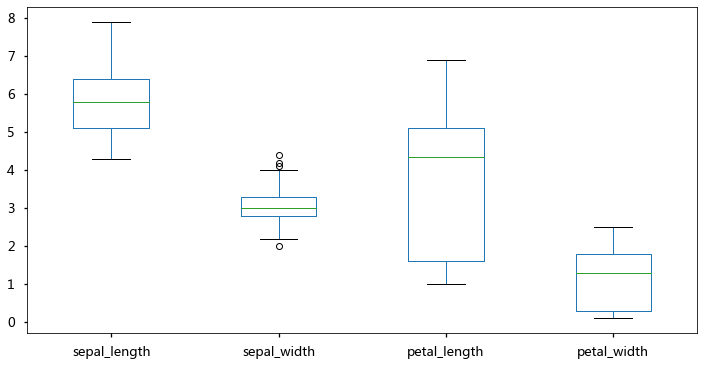

In [4]:
irisdf.plot(y=['sepal_length','sepal_width','petal_length','petal_width'],kind='box',figsize=(12,6))

- 各个属性取值基本可比，不需要进行标准化处理

##### 建立聚类模型

In [5]:
from sklearn.cluster import KMeans

In [6]:
irisKmeans = KMeans(n_clusters=3,random_state=0,n_jobs=-1)
irisKmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

#### 训练$K$均值聚类模型

```python
kmeans.fit(X)
```
- `X`：需要聚类的数据集

In [7]:
irisX = irisdf.iloc[:,:-1]
irisX.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
irisKmeans.fit(irisX)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

##### 训练好的聚类模型的属性

- `labels_`：每个数据点（样本）的标签，即所属的簇

In [9]:
irisKmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

- `inertia_`：簇内误差平方和

In [10]:
irisKmeans.inertia_

78.94084142614602

#### 预测样本所属的距离最近的簇

```python
kmean.predict(X)
```
- 返回值：每个样本属于的簇的标签，是一个数组结构，形状为`[n_samples]`

In [11]:
irisLabel = irisKmeans.predict(irisX)
irisLabel

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

#### 选择$K$值

> 随着$K$值的增大，簇内误差平方和（SSE）会降低

<dl class="row alert-info">
    <dt class="col-xl-4">肘部(elbow)法则<dt>
    <dd class="col-xl-8">识别SSE<strong>开始快速增大</strong>处的$K$值</dd>
</dl>

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

[[Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10')]]

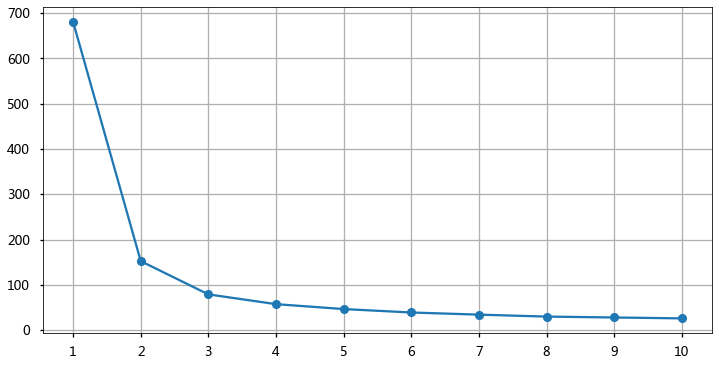

In [12]:
sse = []                ###记录每个k值对应的SSE
for k in range(1,11):
    km = KMeans(n_clusters=k,random_state=0,n_jobs=-1)
    km.fit(irisX)
    sse.append(km.inertia_)
ax = pd.Series(sse).plot(kind='line',figsize=(12,6),marker='o',grid=True,xticks=range(0,10))   #xticks：在哪些位置显示x轴刻度标签
ax.set(xticklabels=range(1,11))        # 改变x轴标签显示，默认是从0开始

- 当$K=3$的时候，SSE**开始快速增大**，所以选择3个簇

## 聚类检验

<dl class="row alert-info">
    <dt class="col-md-4">聚类检验</dt>
    <dd class="col-md-8">检验聚类效果的优劣</dd>
</dl>

### 聚类检验指标

<dl class="row alert-info">
    <dt class="col-lg-4">凝聚度(cohesion)</dt>
    <dd class="col-lg-8">簇内数据点之间的密切程度</dd>
</dl>

- 可以是簇内各个数据点之间距离的均值

<dl class="row alert-danger">
    <dt class="col-lg-4">分离度(separation)</dt>
    <dd class="col-lg-8">某个簇不同于其他簇的程度</dd>
</dl>

- 不同簇的数据点之间的距离的均值

<center><img src="./img/dataMining/cohesionSeparation.png" width=100%></center>

### 轮廓系数（silhouette coefficient）

- 轮廓系数取值在$[-1,1]$，越接近1越好
- 0表示两个簇重合
- -1表示数据点被分配到了错误的簇中

#### `Python`实现

```python
from sklearn import metrics
```

```python
metrics.silhouette_score(X, labels, metric=’euclidean’)
```
- `X`：用于聚类的数据
- `labels`：用聚类技术计算的每个数据样本所属的簇
- 返回值：`float`类型，所有数据样本的轮廓系数的平均值

In [34]:
from sklearn.metrics import silhouette_score

In [36]:
irisSilhouetteScore = silhouette_score(irisdf.iloc[:,:-1],irisKmeans.labels_)
irisSilhouetteScore

0.5525919445499757

## 聚类ohlc数据识别市场风格(market regime）

### 读入数据

In [77]:
rbBar = pd.read_csv('./data/models/rbChangeContract.csv')
rbBar.head()
rbBar.shape

,Date,Open,High,Low,Close
0,2019-12-05 14:15:00,3423.0,3427.0,3422.0,3426.0
1,2019-12-05 14:16:00,3426.0,3428.0,3424.0,3427.0
2,2019-12-05 14:17:00,3428.0,3428.0,3426.0,3426.0
3,2019-12-05 14:18:00,3426.0,3427.0,3425.0,3427.0
4,2019-12-05 14:19:00,3427.0,3428.0,3426.0,3427.0


(54314, 5)

In [78]:
rbBar['Date'] = pd.to_datetime(rbBar['Date'],format='%Y-%m-%d %H:%M:%S')
rbBar.set_index('Date',inplace=True)
rbBar.head()

,Open,High,Low,Close
Date,,,,
2019-12-05 14:15:00,3423.0,3427.0,3422.0,3426.0
2019-12-05 14:16:00,3426.0,3428.0,3424.0,3427.0
2019-12-05 14:17:00,3428.0,3428.0,3426.0,3426.0
2019-12-05 14:18:00,3426.0,3427.0,3425.0,3427.0
2019-12-05 14:19:00,3427.0,3428.0,3426.0,3427.0


### 归一化数据

- 目的：使得各交易时段的数据可比

- 以每个交易时段内的开盘价作为基准

In [79]:
rbBar['HO'] = rbBar['High']/rbBar['Open']
rbBar['LO'] = rbBar['Low']/rbBar['Open']
rbBar['CO'] = rbBar['Close']/rbBar['Open']
rbBar.head()

,Open,High,Low,Close,HO,LO,CO
Date,,,,,,,
2019-12-05 14:15:00,3423.0,3427.0,3422.0,3426.0,1.001169,0.999708,1.000876
2019-12-05 14:16:00,3426.0,3428.0,3424.0,3427.0,1.000584,0.999416,1.000292
2019-12-05 14:17:00,3428.0,3428.0,3426.0,3426.0,1.000000,0.999417,0.999417
2019-12-05 14:18:00,3426.0,3427.0,3425.0,3427.0,1.000292,0.999708,1.000292
2019-12-05 14:19:00,3427.0,3428.0,3426.0,3427.0,1.000292,0.999708,1.000000


In [80]:
rbCluster = rbBar.loc[:,['HO','LO','CO']]
rbCluster.head()

,HO,LO,CO
Date,,,
2019-12-05 14:15:00,1.001169,0.999708,1.000876
2019-12-05 14:16:00,1.000584,0.999416,1.000292
2019-12-05 14:17:00,1.000000,0.999417,0.999417
2019-12-05 14:18:00,1.000292,0.999708,1.000292
2019-12-05 14:19:00,1.000292,0.999708,1.000000


### 选择`k`值

KMeans(n_clusters=1, random_state=10)

KMeans(n_clusters=2, random_state=10)

KMeans(n_clusters=3, random_state=10)

KMeans(n_clusters=4, random_state=10)

KMeans(n_clusters=5, random_state=10)

KMeans(n_clusters=6, random_state=10)

KMeans(n_clusters=7, random_state=10)

KMeans(random_state=10)

KMeans(n_clusters=9, random_state=10)

KMeans(n_clusters=10, random_state=10)

[[Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')]]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


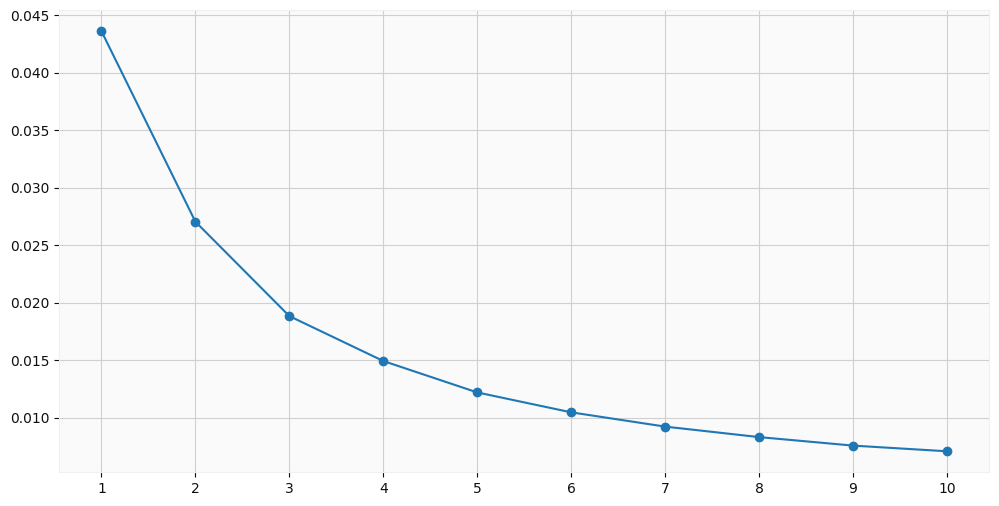

In [81]:
rbSSE = []
for i in range(1,11):
    tmp = cluster.KMeans(n_clusters=i,random_state=10)
    tmp.fit(rbCluster)
    rbSSE.append(tmp.inertia_)
axrb = pd.Series(rbSSE).plot(kind='line',figsize=(12,6),marker='o',grid=True,xticks=range(0,10))
axrb.set(xticklabels=range(1,11))  

- 选择$k=3$

### 聚类

In [82]:
rbkm = cluster.KMeans(n_clusters=3,random_state=10)
rbkm.fit(rbCluster)

KMeans(n_clusters=3, random_state=10)

In [83]:
rbBar['Cluster'] = rbkm.labels_
rbBar.head()

,Open,High,Low,Close,HO,LO,CO,Cluster
Date,,,,,,,,
2019-12-05 14:15:00,3423.0,3427.0,3422.0,3426.0,1.001169,0.999708,1.000876,2
2019-12-05 14:16:00,3426.0,3428.0,3424.0,3427.0,1.000584,0.999416,1.000292,0
2019-12-05 14:17:00,3428.0,3428.0,3426.0,3426.0,1.000000,0.999417,0.999417,1
2019-12-05 14:18:00,3426.0,3427.0,3425.0,3427.0,1.000292,0.999708,1.000292,0
2019-12-05 14:19:00,3427.0,3428.0,3426.0,3427.0,1.000292,0.999708,1.000000,0


In [84]:
metrics.silhouette_score(rbCluster,rbkm.labels_)

0.4294822728303344

### 可视化展示

Text(0.5, 0, 'High/Open')

Text(0.5, 0, 'Low/Open')

Text(0.5, 0, 'Close/Open')

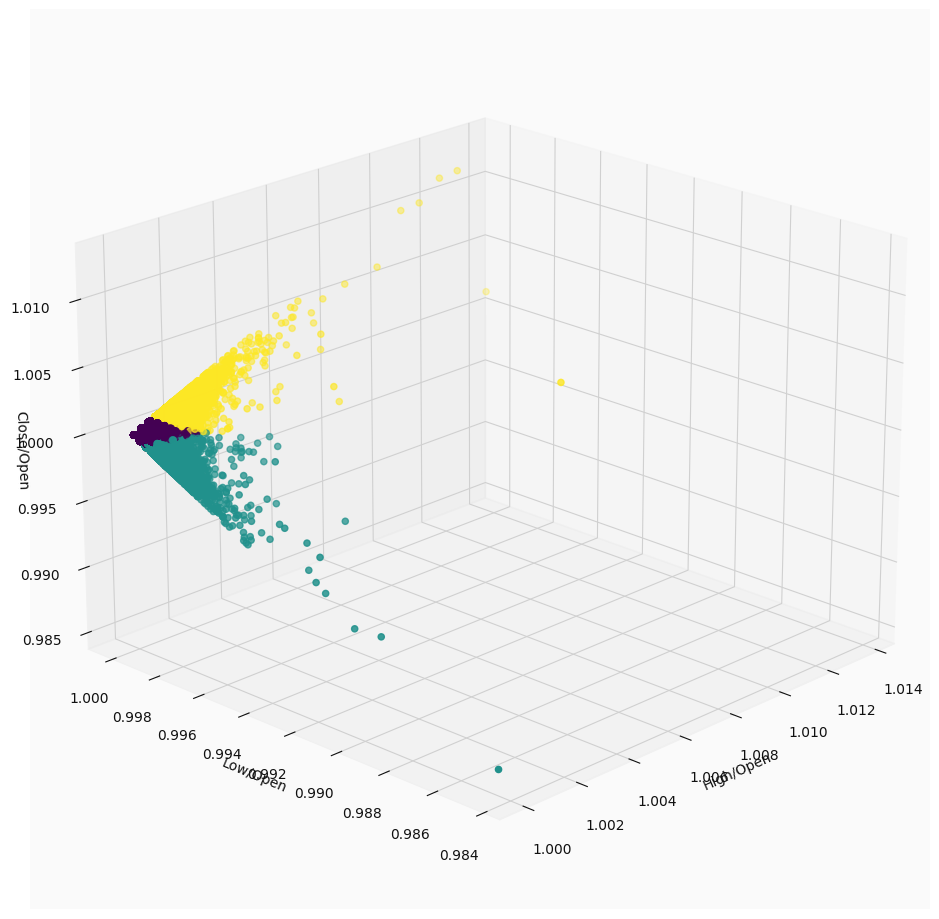

In [85]:
fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig, elev=21, azim=-136)
ax.scatter(
    rbBar["HO"], rbBar["LO"], rbBar["CO"], 
    c=rbkm.labels_.astype(np.float)
)
ax.set_xlabel('High/Open')
ax.set_ylabel('Low/Open')
ax.set_zlabel('Close/Open')
plt.style.use('seaborn-poster')
plt.show()

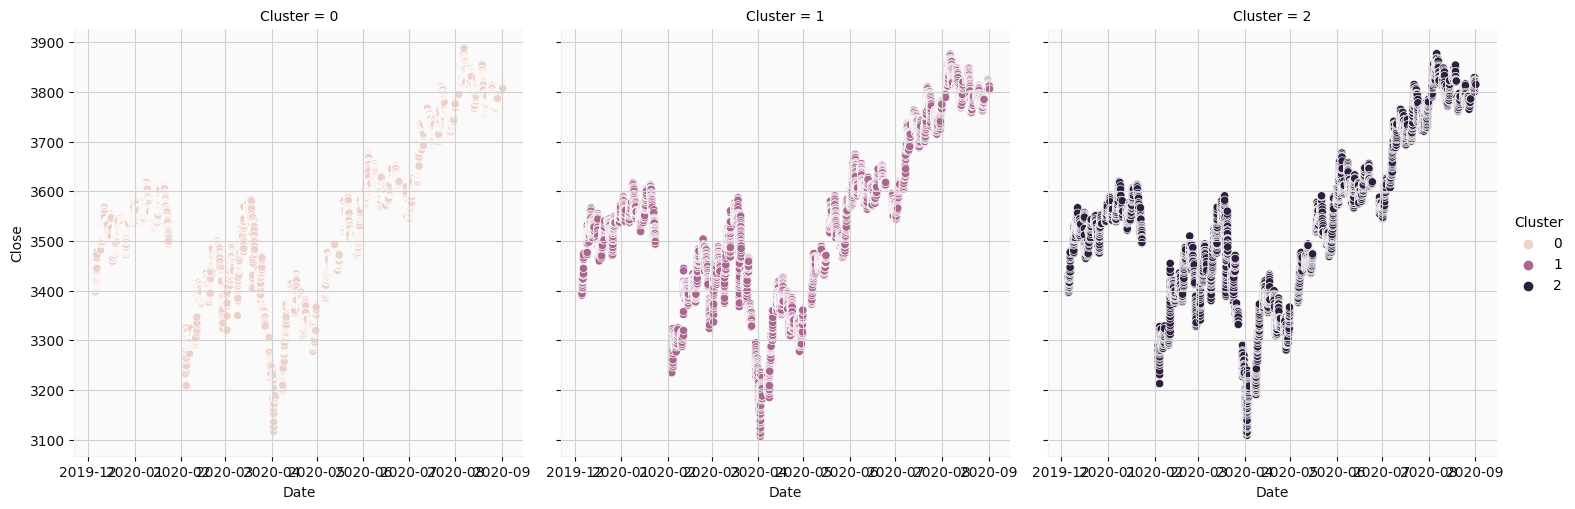

In [100]:
seaborn.relplot(data=rbBar,x=rbBar.index,y='Close',hue='Cluster',col='Cluster')

# 文本挖掘

## 基本概念

- 从非结构化的文本文档中提取有趣的、重要的模式和知识

- 属于***自然语言处理（Natural Language Processing, NLP）***
    - 人工智能和语言学领域的交叉学科，研究如何让计算机“读懂”及运用自然语言

- 文本挖掘一般流程

<center><img src="./img/dataMining/textMiningProcess.png" width=50%></center>

## 文本预处理

- 电影评论

> review 1: This movie is very scary and long

> review 2: This movie is not scary and is slow

> review 3: This movie is spooky and good

### 词袋模型

<dl class="row text-danger">
    <dt class="col-md-6">词袋模型（bag-of-words, BoW）</dt>
    <dd class="col-md-6">
        <p>一种从文本中提取<strong>特征</strong>的方法</p>
        <p>将文本表示成<strong>数字（词在文本中出现的频率）</strong></p>
    </dd>
</dl>

- 舍弃词语的顺序和结构，只保留词语在文档中出现的频次

### 分词

- 将文本分割成**独特的词元（token）**，形成一个词汇表（vocabulary），该过程又被称作tokenization

- 每篇文档表示成与词汇表（vocabulary）中**词元个数**相等的**数组（向量）**，该数组中的每个值就是每个词元在该文档中出现的**频率**

''|This|movie|is|very|scary|and|long|not|slow|spooky|good
---|---|---|---|---|---|---|---|---|---|---|---
Review 1|1|1|1|1|1|1|1|0|0|0|0
Review 2|1|1|2|0|1|1|0|1|1|0|0
Review 3|1|1|1|0|0|1|0|0|0|1|1


#### `sklearn`实现

```python
from sklearn.feature_extraction import text
text.CountVectorizer()
```

In [20]:
docs = ['This movie is very scary and long','This movie is not scary and is slow','This movie is spooky and good']

##### 建立模型并训练

In [21]:
count = text.CountVectorizer()
count.fit(docs)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [22]:
bag = count.transform(docs)

##### 获得特征（词元）名称

In [23]:
count.get_feature_names()

['and',
 'good',
 'is',
 'long',
 'movie',
 'not',
 'scary',
 'slow',
 'spooky',
 'this',
 'very']

##### 获取特征向量

In [24]:
bag.toarray()

array([[1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1],
       [1, 0, 2, 0, 1, 1, 1, 1, 0, 1, 0],
       [1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0]])

In [32]:
pd.DataFrame(bag.toarray(),columns=count.get_feature_names())

,and,good,is,long,movie,not,scary,slow,spooky,this,very
0,1,0,1,1,1,0,1,0,0,1,1
1,1,0,2,0,1,1,1,1,0,1,0
2,1,1,1,0,1,0,0,0,1,1,0


#### 其他NLP工具

- 英文NLP工具
    - `NLTK`（Natural Language Toolkit）：基于`python`的自然语言处理工具包
    - [https://www.nltk.org](https://www.nltk.org)
    - 安装`pip install nltk`

- 中文NLP工具
    - 结巴（jieba）分词：[https://github.com/fxsjy/jieba](https://github.com/fxsjy/jieba)
    - 哈工大LTP：[http://ltp.ai](http://ltp.ai)
    - 清华大学THULAC：[http://thulac.thunlp.org](http://thulac.thunlp.org)
    - 北京大学pkuseg：[https://github.com/lancopku/PKUSeg-python](https://github.com/lancopku/PKUSeg-python)
    - 斯坦福分词器：[https://stanfordnlp.github.io/CoreNLP/](https://stanfordnlp.github.io/CoreNLP/)
    - Hanlp分词：[https://github.com/hankcs/HanLP/](https://github.com/hankcs/HanLP/)

#### jieba分词

- 安装 

```python
pip install jieba
```

- 使用

```python
import jieba
jieba.cut()
```
- 参数：需要分词的字符串
- `cut_all`：是否采用全模式
- 返回一个可迭代对象，通过`for`循环获得分词后的每个词语

```python
jieba.lcut()
```
- 参数同`jieba.cut`，返回的是一个分词后构成的列表

In [37]:
trainText = ['纽约市长白思豪表示','初步迹象显示这是蓄意实施的行为','也无明确证据显示新泽西和纽约曼哈顿爆炸事件有关联']

In [38]:
segIter = jieba.cut(trainText[0],cut_all=True)
for each in segIter:
    print(each)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.169 seconds.
Prefix dict has been built successfully.


纽约
纽约市
市长
长白
思
豪
表示


In [39]:
segLst = jieba.lcut(trainText[0],cut_all=False)
segLst

['纽约市', '长白', '思豪', '表示']

##### 向量化

In [41]:
chCount = text.CountVectorizer()
chCount.fit(trainText)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [42]:
chCount.get_feature_names()

['也无明确证据显示新泽西和纽约曼哈顿爆炸事件有关联', '初步迹象显示这是蓄意实施的行为', '纽约市长白思豪表示']

- `CountVectorizer()`本身不支持中文

##### 利用jieba分词的结果向量化

- 将jieba分词后的词语用**空格**连接起来

In [67]:
trainData = []
for each in trainText:
    trainData.append(' '.join(jieba.cut(each,cut_all=False)))
trainData

['纽约市 长白 思豪 表示',
 '初步 迹象 显示 这是 蓄意 实施 的 行为',
 '也 无 明确 证据 显示 新泽西 和 纽约 曼哈顿 爆炸事件 有 关联']

- 重新向量化

In [68]:
chCountJ = text.CountVectorizer()
chCountJ.fit(trainData)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [69]:
chCountJ.get_feature_names()

['关联',
 '初步',
 '实施',
 '思豪',
 '新泽西',
 '明确',
 '显示',
 '曼哈顿',
 '爆炸事件',
 '纽约',
 '纽约市',
 '蓄意',
 '行为',
 '表示',
 '证据',
 '这是',
 '迹象',
 '长白']

In [71]:
chBag = chCountJ.transform(trainData)
pd.DataFrame(chBag.toarray(),columns=chCountJ.get_feature_names())

,关联,初步,实施,思豪,新泽西,明确,显示,曼哈顿,爆炸事件,纽约,纽约市,蓄意,行为,表示,证据,这是,迹象,长白
0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0
2,1,0,0,0,1,1,1,1,1,1,0,0,0,0,1,0,0,0


#### 去除停用词

<dl class="row text text-info">
    <dt class="col-md-6">停用词（stop words）</dt>
    <dd class="col-md-6">
        在各种文本中经常出现，但是<b>不含有（或含有极少）</b>能够区分文本的有用信息的词元
    </dd>
</dl>

- 例如，*is, and, has, 的,得* 等

##### 英文停用词

- `NLTK`的提用词列表

```python
from nltk.corpus import stopwords
stops = stopwords.words('english')
```

##### 中文停用词

- 中文停用词列表
    - 中文停用词库
    - 哈工大停用词
    - 四川大学机器智能实验室停用词库
    - 百度停用词列

In [58]:
stops = pd.read_fwf('./data/models/hit_stopwords.txt',header=None)
stops

,0
0,———
1,》），
2,）÷（１－
3,”，
4,）、
...,...
762,啐
763,喔唷
764,嗬
765,嗯


## 特征选择

- 通过评估词元在文本中的**重要程度**来选择特征

### TF-IDF方法

- term frequency-inverse document frequency
    - 词频（term frequency）：一个词元在一篇文档中出现的频率
    - 文档频率（document frequency）：含有某个词元的文档数量

> This movie is very scary and long

- 计算This在该句中的词频以及文档频率
    - 在该句中，This的词频为1
    - This的文档频率为3

- 反文档频率(inverse document frequency)

$$
    idf(t,d) = \log\frac{n_d}{df(d,t)}
$$

- $n_d$是需要分析的所有文档的数量，$df(d,t)$包含词元$t$的文档数量

- 计算This的反文档频率
    - $n_d=3, df=3$

In [26]:
np.log(3/3)

0.0

- tf-idf得分

$$
    \text{tf-idf}(t,d) = tf(t,d)\times idf(t,d)
$$

##### `python`实现

```python
from sklearn.feature_extraction import text
text.TfidfTransformer()
```
- 以`CountVectorizer`的结果作为输入的训练数据

In [27]:
tfidf = text.TfidfTransformer()
tfidf.fit(bag)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [29]:
tfidfRes = tfidf.transform(bag)
tfidfRes.toarray()

array([[0.29628336, 0.        , 0.29628336, 0.50165133, 0.29628336,
        0.        , 0.38151877, 0.        , 0.        , 0.29628336,
        0.50165133],
       [0.26359985, 0.        , 0.5271997 , 0.        , 0.26359985,
        0.44631334, 0.3394328 , 0.44631334, 0.        , 0.26359985,
        0.        ],
       [0.32052772, 0.54270061, 0.32052772, 0.        , 0.32052772,
        0.        , 0.        , 0.        , 0.54270061, 0.32052772,
        0.        ]])

In [31]:
pd.DataFrame(tfidfRes.toarray(),columns= count.get_feature_names())

,and,good,is,long,movie,not,scary,slow,spooky,this,very
0,0.296283,0.000000,0.296283,0.501651,0.296283,0.000000,0.381519,0.000000,0.000000,0.296283,0.501651
1,0.263600,0.000000,0.527200,0.000000,0.263600,0.446313,0.339433,0.446313,0.000000,0.263600,0.000000
2,0.320528,0.542701,0.320528,0.000000,0.320528,0.000000,0.000000,0.000000,0.542701,0.320528,0.000000


# 从互联网上获取数据

<dl class="row alert alert-info">
    <dt class="col-md-1">爬虫</dt>
    <dd class="col-md-auto">即网络爬虫，是一种按照一定的规则，自动的抓取互联网信息的程序或者脚本。</dd>
</dl>

<dl class="row alert alert-primary">
    <dt class="col-md-1">静态网页</dt>
    <dd class="col-md-auto">纯粹HTML格式的网页，文件扩展名是<code>.htm</code>、<code>.html</code>。没有后台数据库、不可交互的网页。</dd>
</dl>

<dl class="row alert alert-warning">
    <dt class="col-md-1">动态网页</dt>
    <dd class="col-md-auto">基本的HTML语法规范与高级程序设计语言、数据库编程等多种技术的融合，以期实现对网站内容和风格的高效、动态和交互式的管理。</dd>
</dl>

- `requests-HTML`包, [https://requests-html.kennethreitz.org/](https://requests-html.kennethreitz.org/)

- 通过`Jupyter Notebook`安装
    + `Windows`：`!pip install requests-html`
    + `Mac`：`!pip3 install requests-html`

## 爬取网页

```python
from requests_html import HTMLSession
ss = HTMLSession()                   # 生成一个HTMLSession对象ss
ct = ss.get('http://quotes.toscrape.com/')   # 爬取网页内容，存储在变量ct中
```

## 获取网页上的元素

```python
ct.html.absolute_links    # 获取网页页面上的所有链接，返回链接的列表
```

```python
for html in ct.html:
    print(html)        # 获取网页包含的分页网址
```

### 查找网页上某个元素

- 查找[http://quotes.toscrape.com/](http://quotes.toscrape.com/)上的所有作者

<center>
    <div class="row">
        <div class="col-md-6">Chrome<img src="./img/dataMining/inspectEle.jpg" width=95%></div>
        <div class="col-md-6">FireFox<img src="./img/dataMining/inspectEleF.jpg" width=95%></div>
    </div>
</center>

<center><img src="./img/dataMining/selectEle.jpg" width=80%></center>

```python
authors = ct.html.find('.author',first=False) 
# first=False 找到页面上所有属于author类的元素，返回列表
# first=True 找到页面上第一个属于author类的元素

for author in authors:
    print(author.text)               # 用text显示每个元素包含的文本
```